In [2]:
from graph_tool.all import *

In [3]:
#Create topology to hold graph
top = Graph(directed=True)
top.vertex_properties['label'] = top.new_vertex_property("string","")
top.vertex_properties['pdg'] = top.new_vertex_property("int")
#Create Initial production vertex:
blob = top.add_vertex()
top.vp.label[blob] = 'v0'
top.vp.pdg[blob] = 0
momA = top.add_vertex()
momB = top.add_vertex()
top.vp.label[momA] =  '~c1+'
top.vp.pdg[momA] =  1000024
e = top.add_edge(blob,momA)
top.vp.label[momB] =  '~n20'
top.vp.pdg[momB] =  1000023
e = top.add_edge(blob,momB)
dA1 = top.add_vertex()
top.vp.label[dA1] = '~n1_0'
top.vp.pdg[dA1] =  1000022
eA1 = top.add_edge(momA, dA1)
dA2 = top.add_vertex()
top.vp.label[dA2] = 'W+'
top.vp.pdg[dA2] = 24
eA2 = top.add_edge(momA, dA2)
dB1 = top.add_vertex()
top.vp.label[dB1] = '~n1_0'
top.vp.pdg[dB1] =  1000022
eB1 = top.add_edge(momB, dB1)
dB2 = top.add_vertex()
top.vp.label[dB2] = 'h'
top.vp.pdg[dB2] =  25
eB2 = top.add_edge(momB, dB2)
dA21 = top.add_vertex()
top.vp.label[dA21] = 'e+'
top.vp.pdg[dA21] =  -11
e = top.add_edge(dA2, dA21)
dA22 = top.add_vertex()
top.vp.label[dA22] = 'nu'
top.vp.pdg[dA22] =  12
e = top.add_edge(dA2, dA22)
dB21 = top.add_vertex()
top.vp.label[dB21] = 'b'
top.vp.pdg[dB21] =  5
e = top.add_edge(dB2, dB21)
dB22 = top.add_vertex()
top.vp.label[dB22] = 'b~'
top.vp.pdg[dB22] =  -5
e = top.add_edge(dB2, dB22)

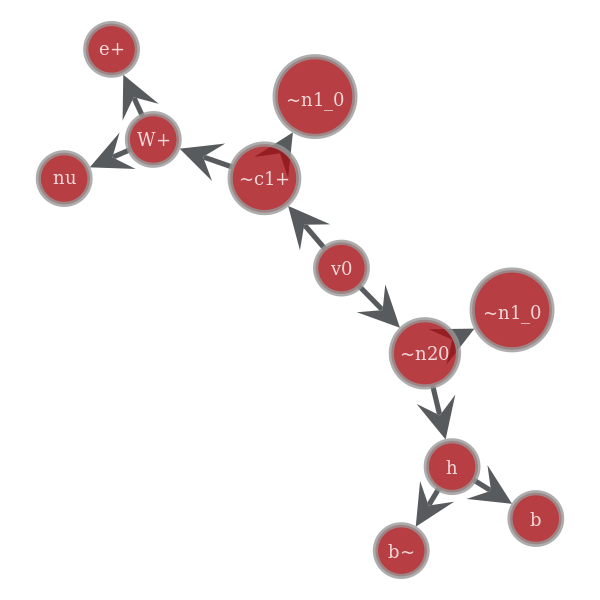

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f8bdc170b10, at 0x7f8bdc161f50>

In [4]:
graph_draw(top, vertex_text=top.vp.label, vertex_font_size=18, inline=True)

In [48]:
bracketNotation = []
#Using the breath-first search method (move laterally):
parent = 0
for mom,daughter in bfs_iterator(top,top.vertex(0)):
    if mom = parent:
        bracketNotation.append([])
    if not daughter.out_degree():
        print top.vp.label[mom],'--->',top.vp.label[daughter],'(stable)'
    else:
        print top.vp.label[mom],'--->',top.vp.label[daughter]

Depth-first:
 v0 ---> ~c1+
	~c1+ ---> ~n1_0 (stable)
	~c1+ ---> W+
		W+ ---> e+ (stable)
		W+ ---> nu (stable)
 v0 ---> ~n20
	~n20 ---> ~n1_0 (stable)
	~n20 ---> h
		h ---> b (stable)
		h ---> b~ (stable)
Breath-first:
v0 ---> ~c1+
v0 ---> ~n20
~c1+ ---> ~n1_0 (stable)
~c1+ ---> W+
~n20 ---> ~n1_0 (stable)
~n20 ---> h
W+ ---> e+ (stable)
W+ ---> nu (stable)
h ---> b (stable)
h ---> b~ (stable)


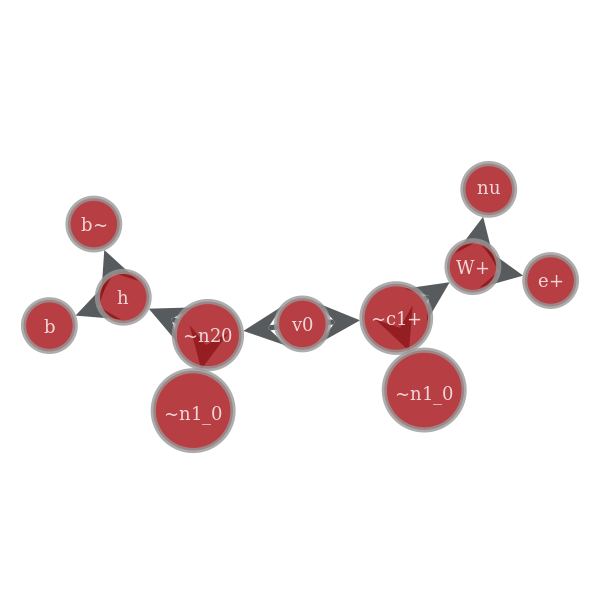

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f882e874e50, at 0x7f882e8881d0>

In [32]:
#Create a similar topology but with distinct ordering
topB = Graph(directed=True)
topB.vertex_properties['label'] = topB.new_vertex_property("string","")
topB.vertex_properties['pdg'] = top.new_vertex_property("int")
#Create Initial production vertex:
blob = topB.add_vertex()
topB.vp.label[blob] = 'v0'
topB.vp.pdg[blob] = 0

#Create initial states
#and its links to the initial production vertex:
momB = topB.add_vertex()
momA = topB.add_vertex()
topB.vp.label[momA] =  '~c1+'
topB.vp.pdg[momA] = 1000024
topB.add_edge(blob,momA)
topB.vp.label[momB] =  '~n20'
topB.vp.pdg[momB] = 1000023
topB.add_edge(blob,momB)

#Create First-Level Daugther particles
#and create Links between mother and daughters:
dA1 = topB.add_vertex()
topB.vp.label[dA1] = 'W+'
topB.vp.pdg[dA1] = 24
eA1 = topB.add_edge(momA, dA1)
dA2 = topB.add_vertex()
topB.vp.label[dA2] = '~n1_0'
topB.vp.pdg[dA2] = 1000022
eA2 = topB.add_edge(momA, dA2)
dB1 = topB.add_vertex()
topB.vp.label[dB1] = '~n1_0'
topB.vp.pdg[dB1] = 1000022
eB1 = topB.add_edge(momB, dB1)
dB2 = topB.add_vertex()
topB.vp.label[dB2] = 'h'
topB.vp.pdg[dB2] = 25
eB2 = topB.add_edge(momB, dB2)

#Create Second-Level Daugther particles
#and create Links between mother and daughters:
dA21 = topB.add_vertex()
topB.vp.label[dA21] = 'nu'
topB.vp.pdg[dA21] = 12
e = topB.add_edge(dA1, dA21)
dA22 = topB.add_vertex()
topB.vp.label[dA22] = 'e+'
topB.vp.pdg[dA22] = -11
e = topB.add_edge(dA1, dA22)
dB21 = topB.add_vertex()
topB.vp.label[dB21] = 'b~'
topB.vp.pdg[dB21] = -5
e = topB.add_edge(dB2, dB21)
dB22 = topB.add_vertex()
topB.vp.label[dB22] = 'b'
topB.vp.pdg[dB22] = 5
e = topB.add_edge(dB2, dB22)

graph_draw(topB, vertex_text=topB.vp.label, vertex_font_size=18, inline=True)

In [34]:
#Check overall shape isomorphism
print isomorphism(top,topB)
#Check isomorphism including particle PDGs:
print isomorphism(top,topB,vertex_inv1=top.vp.pdg,vertex_inv2=topB.vp.pdg)

True
True


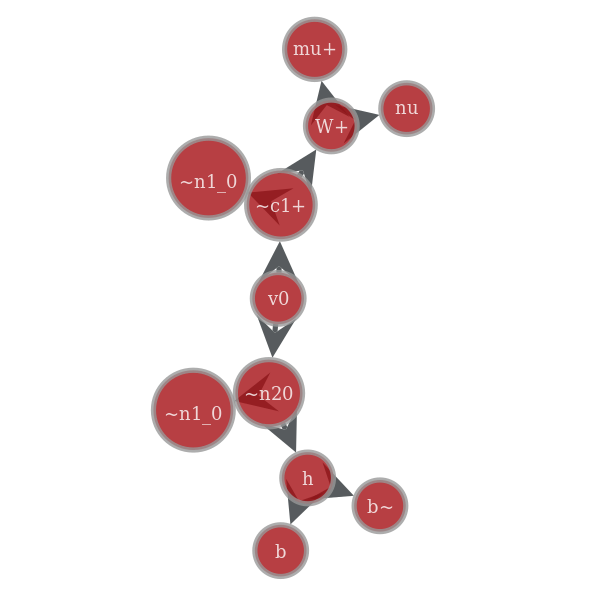

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f882e8740d0, at 0x7f882e8744d0>

In [35]:
topC = Graph(topB)
topC.vp.label[topC.vertex(8)] = 'mu+'
topC.vp.pdg[topC.vertex(8)] = -13
graph_draw(topC, vertex_text=topC.vp.label, vertex_font_size=18, inline=True)

In [36]:
#Check overall shape isomorphism
print isomorphism(topB,topC)
#Check isomorphism including particle PDGs:
print isomorphism(topB,topC,vertex_inv1=topB.vp.pdg,vertex_inv2=topC.vp.pdg)

True
False


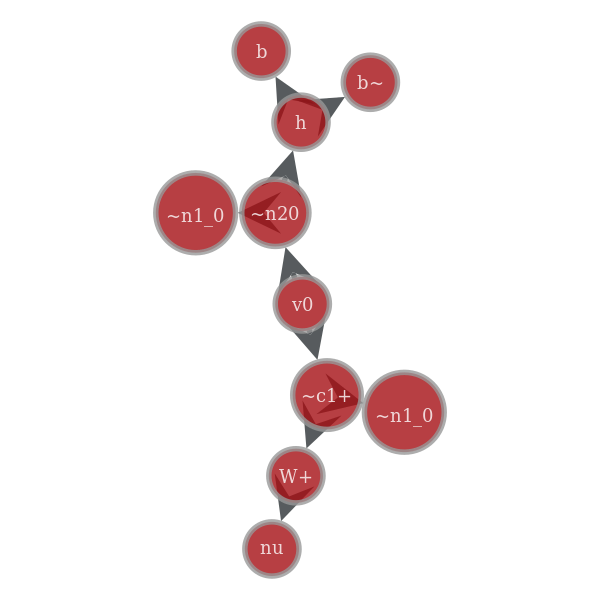

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f882e85a810, at 0x7f882e874290>

In [37]:
topD = Graph(topB)
for e in topD.vertex(8).in_edges():
    topD.remove_edge(e)
topD.remove_vertex(8)
graph_draw(topD, vertex_text=topD.vp.label, vertex_font_size=18, inline=True)

In [38]:
#Check overall shape isomorphism
print isomorphism(topB,topD)
#Check isomorphism including particle PDGs:
print isomorphism(topB,topD,vertex_inv1=topB.vp.pdg,vertex_inv2=topD.vp.pdg)

False
False


In [45]:
#Get isomorphism mapping between two isomorphic graphs:
is_isomorphic,isomap = isomorphism(top,topB,vertex_inv1=top.vp.pdg,vertex_inv2=topB.vp.pdg,isomap=True)
for v in top.vertices():
    print v,'=',isomap[v],'(',top.vp.label[v],'=',topB.vp.label[isomap[v]],')'

0 = 0 ( v0 = v0 )
1 = 2 ( ~c1+ = ~c1+ )
2 = 1 ( ~n20 = ~n20 )
3 = 4 ( ~n1_0 = ~n1_0 )
4 = 3 ( W+ = W+ )
5 = 5 ( ~n1_0 = ~n1_0 )
6 = 6 ( h = h )
7 = 8 ( e+ = e+ )
8 = 7 ( nu = nu )
9 = 10 ( b = b )
10 = 9 ( b~ = b~ )
